In [2]:
import cv2
import numpy as np
import imgaug as ia
import imgaug.augmenters as iaa

ann_img = np.zeros((30,30,3)).astype('uint8')
ann_img[ 3 , 4 ] = 1 # this would set the label of pixel 3,4 as 1
ann_img[ 0 , 0 ] = 2 # this would set the label of pixel 0,0 as 2

cv2.imwrite( "ann_1.png" ,ann_img )

True

In [3]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

def augment_seg( img , seg  ):
	
	aug_det = seq.to_deterministic() 
	image_aug = aug_det.augment_image( img )

	segmap = ia.SegmentationMapOnImage( seg , nb_classes=np.max(seg)+1 , shape=img.shape )
	segmap_aug = aug_det.augment_segmentation_maps( segmap )
	segmap_aug = segmap_aug.get_arr_int()

	return image_aug , segmap_aug

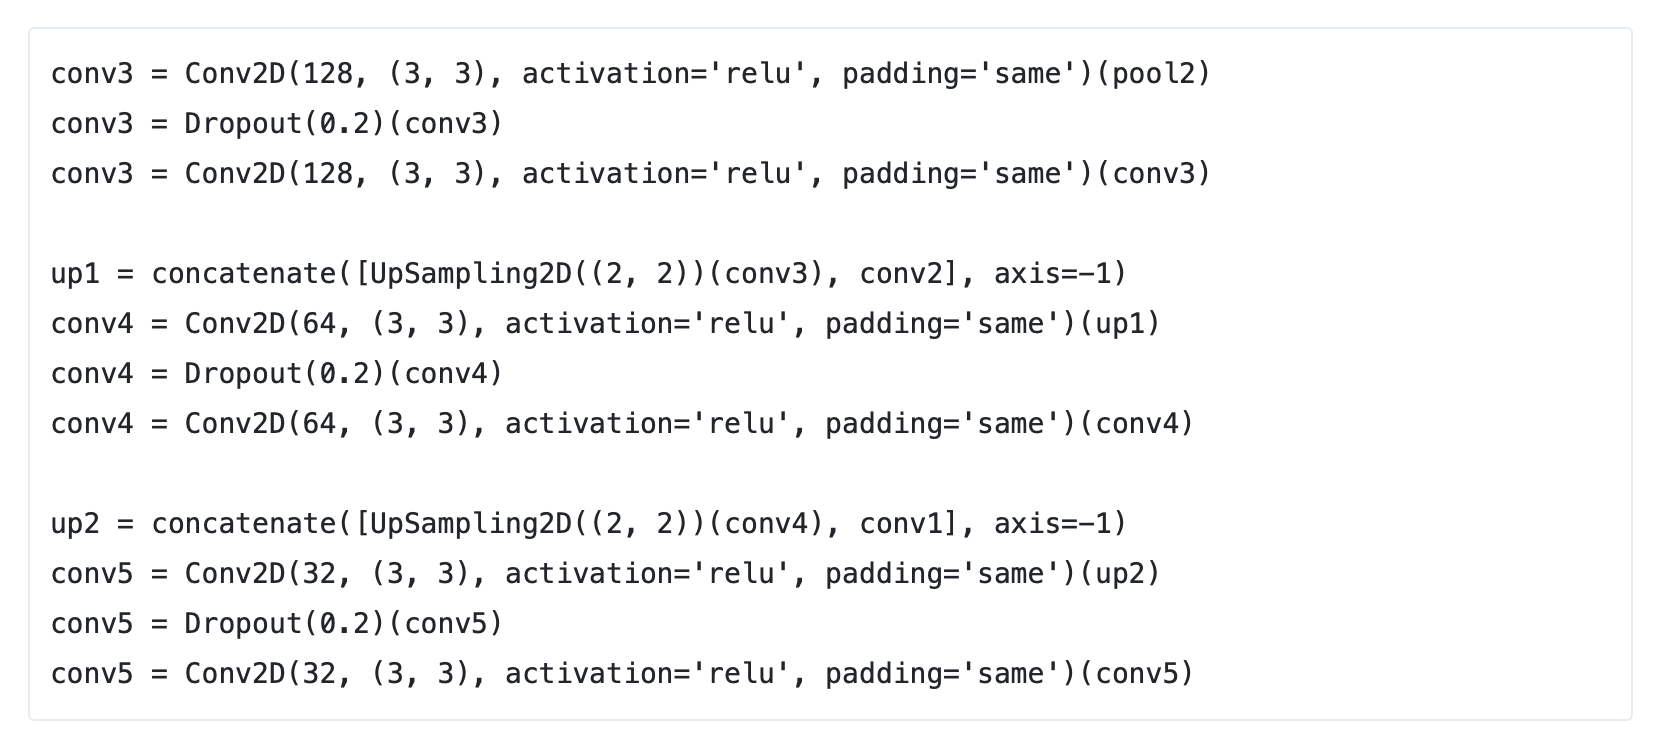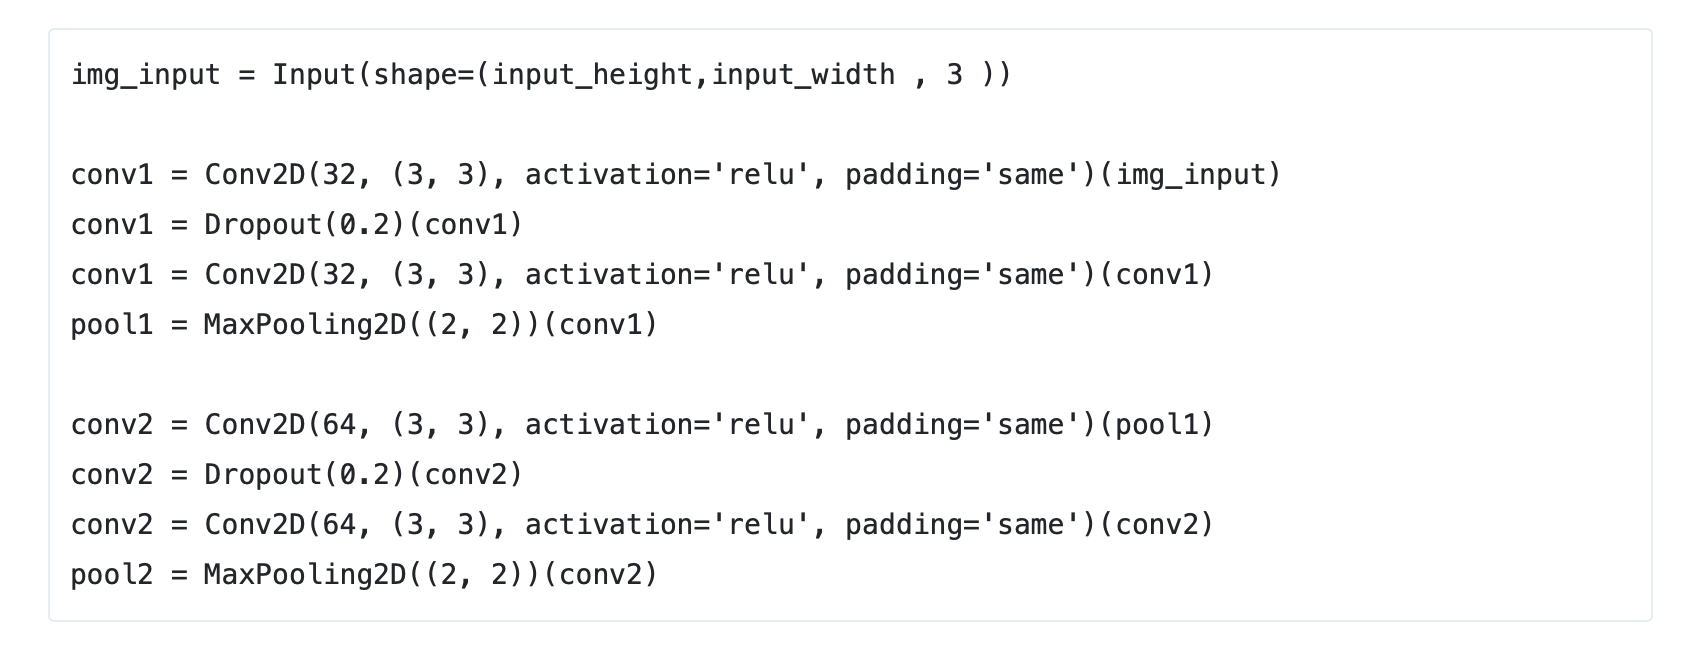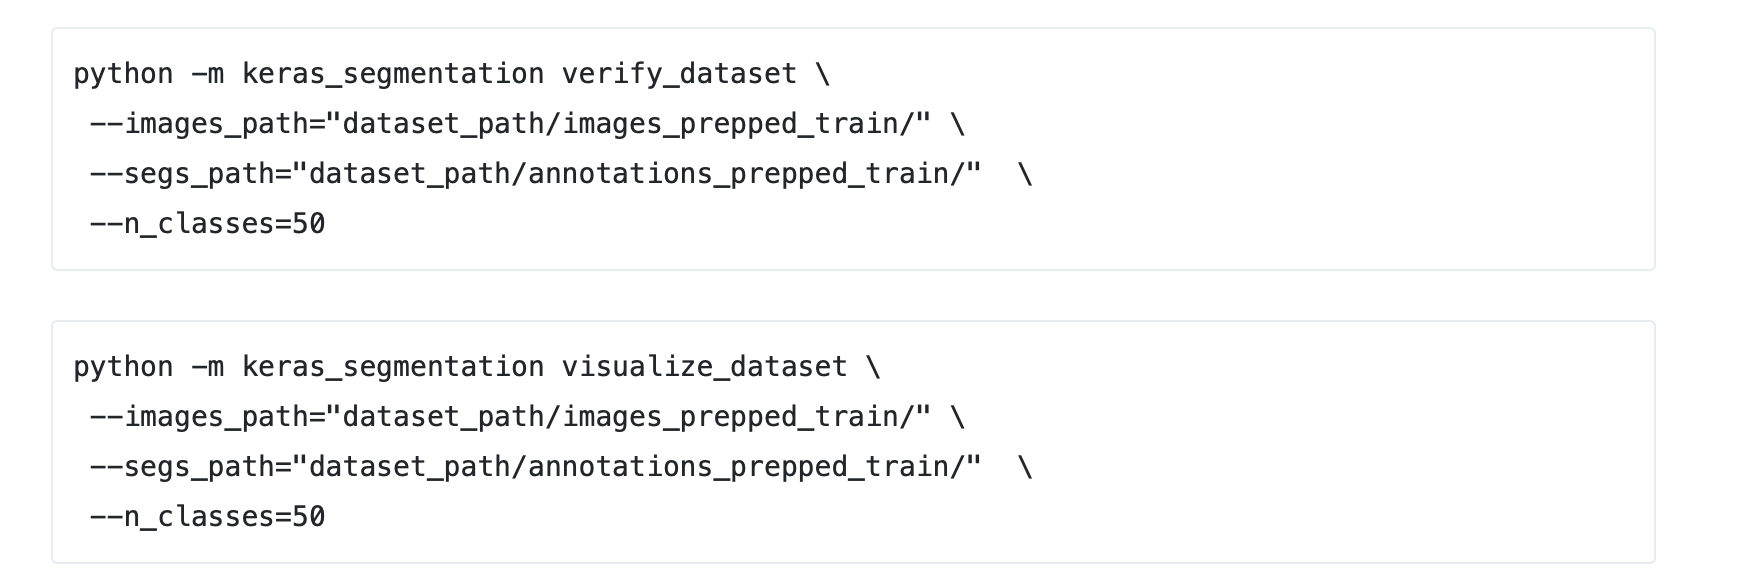

In [ ]:
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51 ,  input_height=416, input_width=608  )

In [ ]:
model.train( 
    train_images =  "dataset_path/images_prepped_train/",
    train_annotations = "dataset_path/annotations_prepped_train/",
    checkpoints_path = "checkpoints/vgg_unet_1" , epochs=5
)

In [ ]:
out = model.predict_segmentation(
    inp="dataset_path/images_prepped_test/0016E5_07965.png",
    out_fname="output.png"
)

In [ ]:
from keras_segmentation.predict import predict


predict( 
	checkpoints_path="checkpoints/vgg_unet_1", 
	inp="dataset_path/images_prepped_test/0016E5_07965.png", 
	out_fname="output.png" 
)

In [ ]:
from keras_segmentation.predict import predict_multiple


predict_multiple( 
	checkpoints_path="checkpoints/vgg_unet_1", 
	inp_dir="dataset_path/images_prepped_test/", 
	out_dir="outputs/" 
)